In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

EXPERIMENT_ID = 8
TRIAL_ID = 0

Ramię musi pokonać grupę losowo poruszających się przeszkód.

In [10]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [2] * 14
d = len(S)
x_min = np.array([0, -np.pi] * (d // 2))
x_max = np.array([np.pi, 0] * (d // 2))
T = 6

rectangle_lists = [[] for _ in range(T)]
for t in range(T):
    rectangle_lists[t].append(((-2, -2), (-1, 15)))
    rectangle_lists[t].append(((12, -2), (13, 15)))
    rectangle_lists[t].append(((-2, -3), (13, -2)))
    for i in range(1, 8, 2):
        for j in range(-1, 12, 2):
            dx, dy = np.random.uniform(-0.5, 0.5, 2)
            rectangle_lists[t].append(((i+dx, j+dy), (i+1+dx, j+1+dy)))
            
targets = [(10, 10)] * T
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 300
alpha_inf = 0.8
n_immigrants = 50
eta_c = 3.
eta_m = 15.
p_c = 0.9
p_m = np.linspace(0.02, 0.1, d)
num_iterations_init = 160
num_iterations = 80

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)
TRIAL_ID = 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 0, best: -, #infeasible: 300, best: [ 0.14262791 16.        ]
Iteration 20, #feasible: 2, best: [13.27787607], #infeasible: 298, best: [3.28750635e-04 2.00000000e+00]
Iteration 40, #feasible: 40, best: [1.60890994], #infeasible: 260, best: [3.28750635e-04 1.00000000e+00]
Iteration 60, #feasible: 60, best: [0.65368858], #infeasible: 240, best: [2.10004158e-05 1.00000000e+00]
Iteration 80, #feasible: 60, best: [0.02019117], #infeasible: 240, best: [1.24340375e-05 1.00000000e+00]
Iteration 100, #feasible: 60, best: [0.00233275], #infeasible: 240, best: [1.24340375e-05 1.00000000e+00]
Iteration 120, #feasible: 60, best: [0.00012476], #infeasible: 240, best: [3.73612754e-06 1.00000000e+00]
Iteration 140, #feasible: 60, best: [9.02948787e-05], #infeasible: 240, best: [8.35835596e-07 1.00000000e+00]
Iteration 159, #feasible: 60, best: [8.12298712e-06], #infeasible: 240, best: [3.36907387e-08 1.00000000e+00]
t=1
Iteration 0, #feasible: 0, best: -, #infeasible: 300, best

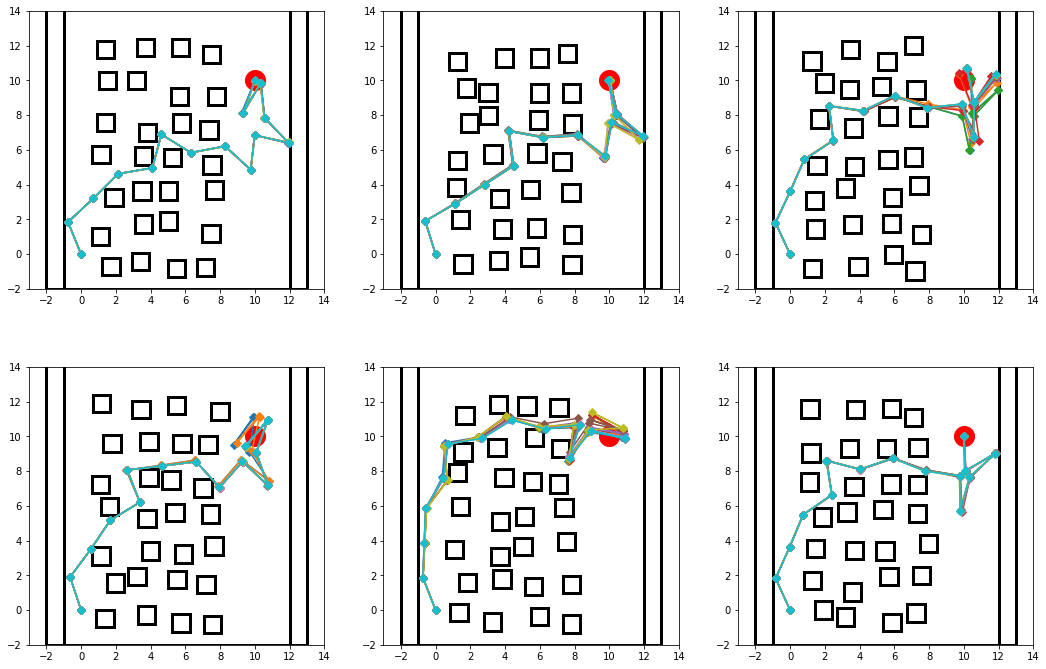

In [11]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=3, figsize=(18, 12), xlim=(-3, 14), ylim=(-2, 14), squeeze=False)

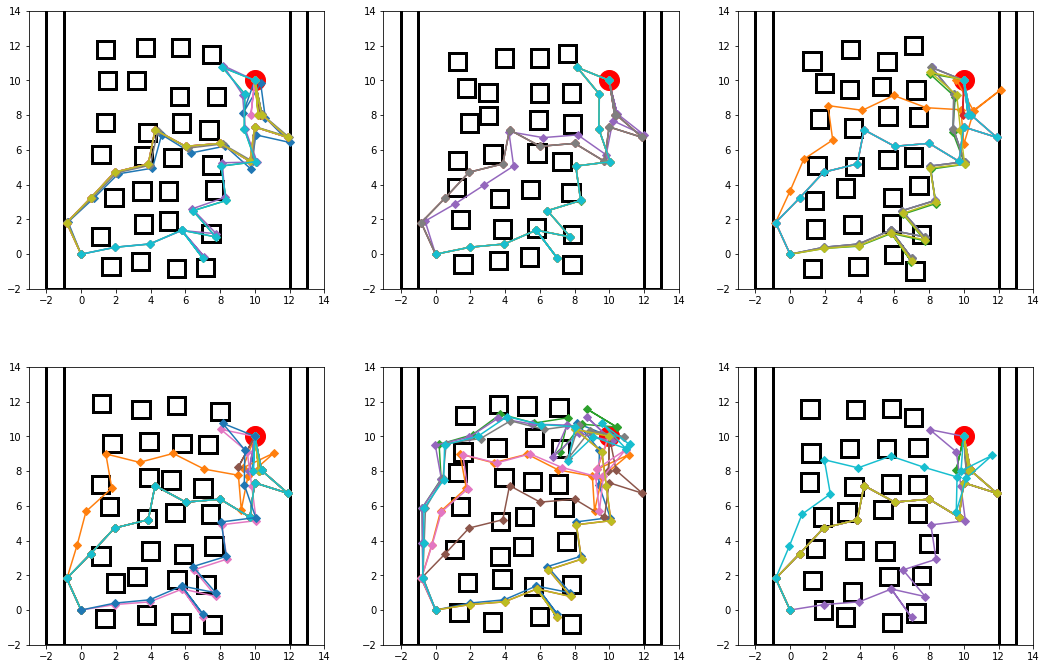

In [12]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=3, figsize=(18, 12), xlim=(-3, 14), ylim=(-2, 14), squeeze=False)